In [380]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from datetime import datetime
from scipy.stats import linregress
from citipy import citipy
pd.options.display.float_format = '{:,.0f}'.format
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [381]:
visitor_path = "Data/changes-visitors-covid.csv"
covid_path = "Data/covid-data.csv"
debt_path = "Data/debt-relief-covid.csv"
income_path = "Data/income-support-covid.csv"
face_path = "Data/face-covering-policies-covid.csv"
travel_path = "Data/international-travel-covid.csv"
school_path = "Data/school-closures-covid.csv"


In [382]:
visitor_data = pd.read_csv(visitor_path)
covid_data = pd.read_csv(covid_path)
debt_data = pd.read_csv(debt_path)
income_data = pd.read_csv(income_path)
face_data = pd.read_csv(face_path)
travel_data = pd.read_csv(travel_path)
school_data = pd.read_csv(school_path)


In [383]:
# visitor_data.head()

In [384]:
covid_data.location.nunique()

230

In [385]:
# covid_data.location.unique().tolist()

In [388]:
# covid_data.info

In [389]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1,1,nan,nan,nan,nan,...,nan,597,10,nan,nan,38,0,65,1,nan
1,AFG,Asia,Afghanistan,2020-02-25,1,0,nan,nan,nan,nan,...,nan,597,10,nan,nan,38,0,65,1,nan
2,AFG,Asia,Afghanistan,2020-02-26,1,0,nan,nan,nan,nan,...,nan,597,10,nan,nan,38,0,65,1,nan
3,AFG,Asia,Afghanistan,2020-02-27,1,0,nan,nan,nan,nan,...,nan,597,10,nan,nan,38,0,65,1,nan
4,AFG,Asia,Afghanistan,2020-02-28,1,0,nan,nan,nan,nan,...,nan,597,10,nan,nan,38,0,65,1,nan


In [390]:
# covid_data.dtypes

In [391]:
# getting data for the desired counties as a data frame
au_data = covid_data[covid_data.location == "Australia"]
usa_data = covid_data[covid_data.location == "United States"]
ind_data = covid_data[covid_data.location == "India"]
chn_data = covid_data[covid_data.location == "China"]
uk_data = covid_data[covid_data.location == "United Kingdom"]
bz_data = covid_data[covid_data.location == "Brazil"]
kr_data = covid_data[covid_data.location == "South Korea"]

In [392]:
# makig a list of the countries data frame and then concat them into a data frame.
frames = [au_data,usa_data,ind_data,chn_data,uk_data,bz_data,kr_data]
country_df = pd.concat(frames)
country_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
5038,AUS,Oceania,Australia,2020-01-26,4,4,nan,nan,nan,nan,...,0,108,5,13,16,nan,4,83,1,6
5039,AUS,Oceania,Australia,2020-01-27,5,1,nan,nan,nan,nan,...,0,108,5,13,16,nan,4,83,1,nan
5040,AUS,Oceania,Australia,2020-01-28,5,0,nan,nan,nan,nan,...,0,108,5,13,16,nan,4,83,1,nan
5041,AUS,Oceania,Australia,2020-01-29,6,1,nan,nan,nan,nan,...,0,108,5,13,16,nan,4,83,1,nan
5042,AUS,Oceania,Australia,2020-01-30,9,3,nan,nan,nan,nan,...,0,108,5,13,16,nan,4,83,1,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80973,KOR,Asia,South Korea,2021-06-12,"147,874",452,532,"1,985",3,2,...,0,86,7,6,41,nan,12,83,1,nan
80974,KOR,Asia,South Korea,2021-06-13,"148,273",399,519,"1,988",3,2,...,0,86,7,6,41,nan,12,83,1,nan
80975,KOR,Asia,South Korea,2021-06-14,"148,647",374,508,"1,992",4,2,...,0,86,7,6,41,nan,12,83,1,nan
80976,KOR,Asia,South Korea,2021-06-15,"149,191",544,500,"1,993",1,2,...,0,86,7,6,41,nan,12,83,1,nan


In [393]:
# making dataframe for for income for the required countries
au_inc = income_data[income_data.Entity == "Australia"]
usa_inc = income_data[income_data.Entity == "United States"]
ind_inc = income_data[income_data.Entity == "India"]
chn_inc = income_data[income_data.Entity == "China"]
uk_inc = income_data[income_data.Entity == "United Kingdom"]
bz_inc = income_data[income_data.Entity == "Brazil"]
kr_inc = income_data[income_data.Entity == "South Korea"]
# au_inc

In [394]:
# making list of data frames and then contacting them 
frames_inc = [au_inc,usa_inc,ind_inc,chn_inc,uk_inc,bz_inc,kr_inc]
country_inc = pd.concat(frames_inc)
country_inc

,Entity,Code,Day,income_support
3663,Australia,AUS,2020-01-01,0
3664,Australia,AUS,2020-01-02,0
3665,Australia,AUS,2020-01-03,0
3666,Australia,AUS,2020-01-04,0
3667,Australia,AUS,2020-01-05,0
...,...,...,...,...
79320,South Korea,KOR,2021-06-10,1
79321,South Korea,KOR,2021-06-11,1
79322,South Korea,KOR,2021-06-12,1
79323,South Korea,KOR,2021-06-13,1


In [484]:
# combinig all covid data and income data into a single dataframe.
con_cov_inc = pd.merge(country_df,country_inc , left_on=["iso_code", "date"],right_on=['Code','Day'])
con_cov_inc

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,Entity,Code,Day,income_support
0,AUS,Oceania,Australia,2020-01-26,4,4,nan,nan,nan,nan,...,16,nan,4,83,1,6,Australia,AUS,2020-01-26,0
1,AUS,Oceania,Australia,2020-01-27,5,1,nan,nan,nan,nan,...,16,nan,4,83,1,nan,Australia,AUS,2020-01-27,0
2,AUS,Oceania,Australia,2020-01-28,5,0,nan,nan,nan,nan,...,16,nan,4,83,1,nan,Australia,AUS,2020-01-28,0
3,AUS,Oceania,Australia,2020-01-29,6,1,nan,nan,nan,nan,...,16,nan,4,83,1,nan,Australia,AUS,2020-01-29,0
4,AUS,Oceania,Australia,2020-01-30,9,3,nan,nan,nan,nan,...,16,nan,4,83,1,nan,Australia,AUS,2020-01-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,KOR,Asia,South Korea,2021-06-10,"146,859",556,572,"1,981",2,2,...,41,nan,12,83,1,nan,South Korea,KOR,2021-06-10,1
3432,KOR,Asia,South Korea,2021-06-11,"147,422",563,547,"1,982",1,2,...,41,nan,12,83,1,nan,South Korea,KOR,2021-06-11,1
3433,KOR,Asia,South Korea,2021-06-12,"147,874",452,532,"1,985",3,2,...,41,nan,12,83,1,nan,South Korea,KOR,2021-06-12,1
3434,KOR,Asia,South Korea,2021-06-13,"148,273",399,519,"1,988",3,2,...,41,nan,12,83,1,nan,South Korea,KOR,2021-06-13,1


In [531]:
clean_df = con_cov_inc[["iso_code","location","date","new_cases","total_deaths","income_support"]]
clean_df["date"] = clean_df["date"].astype(str).str[:7]
clean_df.dropna(inplace=True)
clean_df = clean_df.reset_index(drop=True)
clean_df

<ipython-input-531-1747cf4c29fa>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-531-1747cf4c29fa>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso_code,location,date,new_cases,total_deaths,income_support
0,AUS,Australia,2020-03,2,1,0
1,AUS,Australia,2020-03,3,1,0
2,AUS,Australia,2020-03,9,1,0
3,AUS,Australia,2020-03,13,2,0
4,AUS,Australia,2020-03,3,2,0
...,...,...,...,...,...,...
3231,KOR,South Korea,2021-06,556,"1,981",1
3232,KOR,South Korea,2021-06,563,"1,982",1
3233,KOR,South Korea,2021-06,452,"1,985",1
3234,KOR,South Korea,2021-06,399,"1,988",1


In [532]:
# seeing if all the data is available for all the countries for the dates given
sort_values= clean_df.groupby(["date"])["location"].nunique()
# sort_values

In [539]:
new_cases = clean_df.groupby(["date","location"],as_index=False)["new_cases"].sum()
new_cases

,date,location,new_cases
0,2020-01,China,"9,242"
1,2020-02,China,"69,471"
2,2020-02,South Korea,"3,119"
3,2020-02,United States,8
4,2020-03,Australia,"4,534"
...,...,...,...
108,2021-05,United States,"757,530"
109,2021-06,Australia,39
110,2021-06,China,350
111,2021-06,South Korea,"7,848"


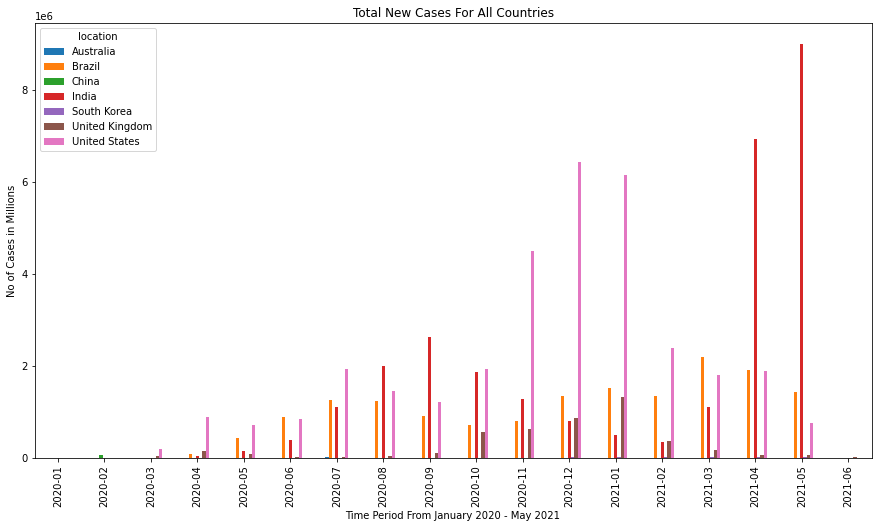

In [569]:
new_cases.pivot(index="date", columns="location", values="new_cases").plot(kind="bar", figsize=(15, 8))
plt.title("Total New Cases For All Countries")
plt.xlabel("Time Period From January 2020 - May 2021")
plt.ylabel("No of Cases in Millions")
plt.savefig("Output/total_new_cases_bar.png")
plt.show()

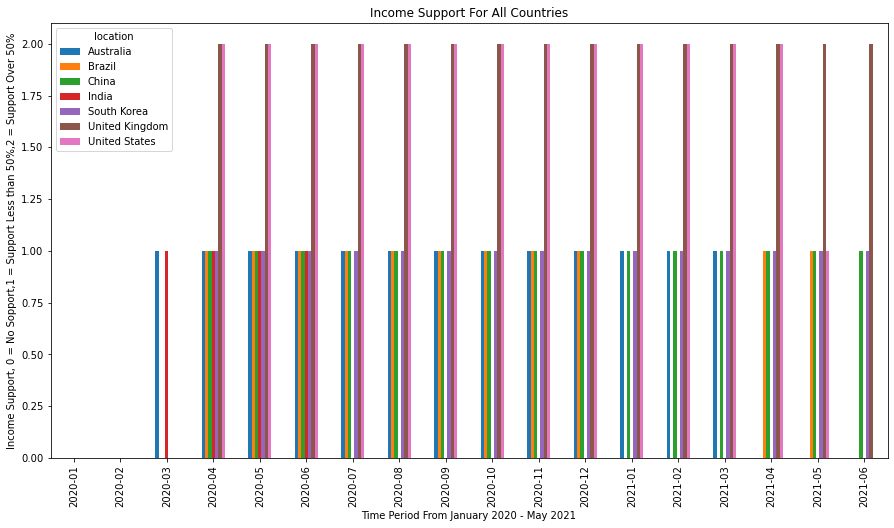

In [570]:
income_data.pivot(index="date", columns="location", values="income_support").plot(kind="bar", figsize=(15, 8))
plt.title("Income Support For All Countries")
plt.xlabel("Time Period From January 2020 - May 2021")
plt.ylabel("Income Support, 0 = No Sopport,1 = Support Less than 50%,2 = Support Over 50%")
plt.savefig("Output/income_support.png")
plt.show()

In [513]:
clean_df["iso_code"].value_counts()

CHN    509
KOR    481
AUS    461
GBR    456
USA    449
IND    447
BRA    433
Name: iso_code, dtype: int64

In [525]:
inc_supp = clean_df.groupby(["location","date"],as_index=False)["income_support"].min()
# inc_supp

In [526]:
new_case = clean_df.groupby(["location"],as_index=False)["new_cases"].sum()
# new_case

In [517]:
new_case.loc[:,"new_cases"]

0       30,132
1   16,083,058
2       90,975
3   28,174,988
4      148,616
5    4,521,627
6   33,108,274
Name: new_cases, dtype: float64

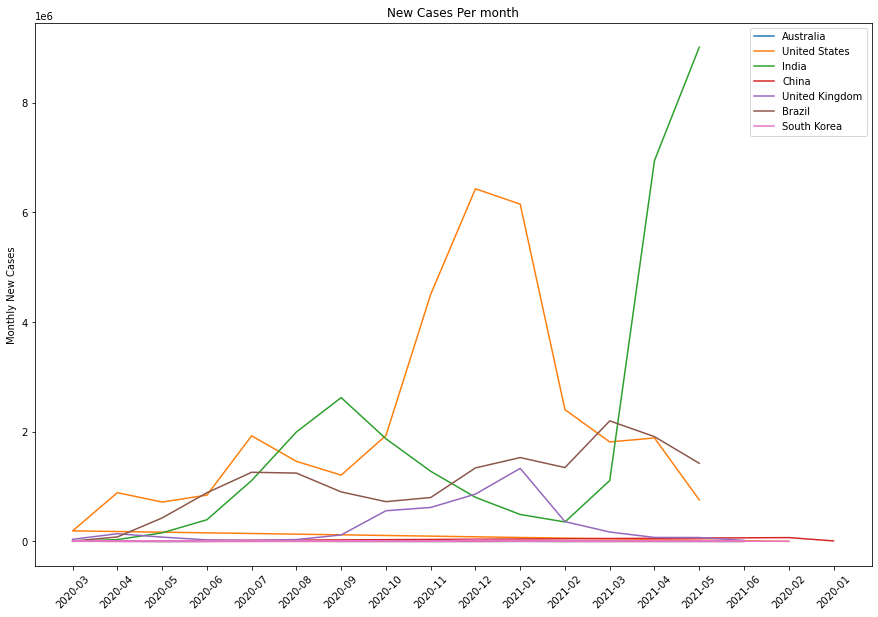

In [551]:
fig,ax = plt.subplots(figsize=(15,10))
countries = ['Australia', 'United States', 'India', 'China', 'United Kingdom', 'Brazil', 'South Korea']
for country in countries:
    monthly_new_cases = clean_df[(clean_df["location"] == country)].groupby(['date'])['new_cases'].sum()
    income_support = clean_df[(clean_df["location"] == country)].groupby(['date'])['income_support'].max()

    ax.set_ylabel("Monthly New Cases")
    ax.plot(monthly_new_cases, label = country)
    
ax.set_ylabel('Monthly New Cases')
ax.set_title('New Cases Per month')
ax.legend()
plt.xticks(rotation=45)
# plt.savefig("output/new_cases_7_each_country_line_plot.png")
plt.show()

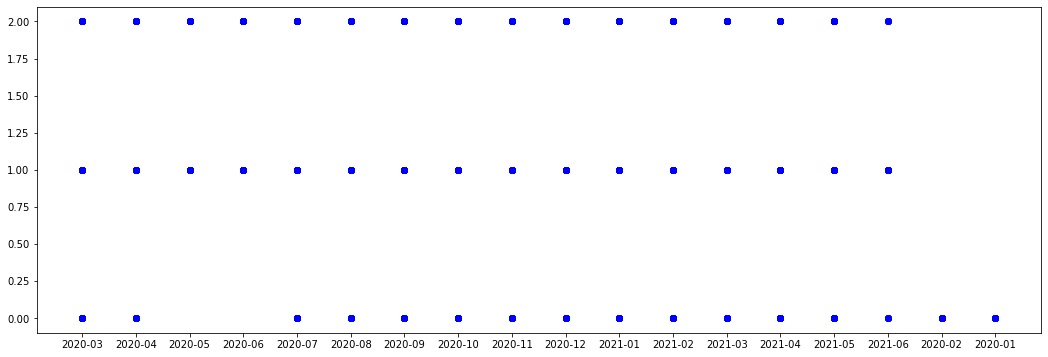

In [557]:
# pd.plotting.deregister_matplotlib_converters()
plt.figure(figsize=(18,6))
plt.scatter(clean_df["date"],clean_df["income_support"],color="blue",label="new cases")
# plt.plot(clean_df.loc[:,"date"],clean_df.loc[:,"date"],color="red",label="new cases")
         

In [520]:
# # multiple line plots
# x_values = clean_df.groupby(["location"])["date"].unique()
# # x_values
# y_values = clean_df.groupby(["location"])["new_cases"].sum()
# # y_values
# plt.plot( 'x_values', 'y_values', data=new_cases, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# # plt.plot( 'x_values', 'y2_values', data=df, marker='', color='olive', linewidth=2)
# # plt.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# # show legend
# plt.legend()

# # show graph
# plt.show()

<ipython-input-543-06aba44d38c8>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

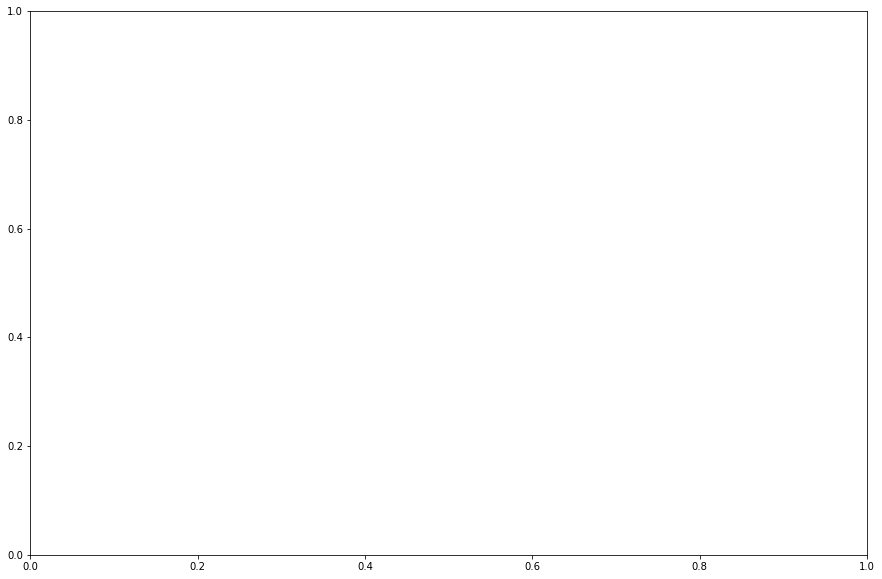

In [543]:
# fig,ax = plt.subplots(figsize=(15,10))
# countries = ['Australia', 'United States', 'India', 'China', 'United Kingdom', 'Brazil', 'South Korea']
# for country in countries:
#     monthly_new_cases = clean_df[(new_cases["location"] == "Australia")].groupby(['date'])['new_cases'].sum()
#     # type(monthly_new_cases)
#     ax.bar(new_cases[(new_cases["location"] == "Australia")]['date'].unique(), monthly_new_cases, label = country)
    
# ax.set_ylabel('Monthly New Cases')
# ax.set_title('New Cases Per month')
# ax.legend()
# plt.xticks(rotation=45)
# # plt.savefig("output/new_cases_7_each_country_barplot.png")
# plt.show()

In [93]:
# # making data frame with selected columns
# country_df = country_df[["iso_code","location","date","total_cases","new_cases","total_deaths"]]
# country_df['month_year'] = pd.to_datetime(country_df['date']).dt.to_period('M')
# country_df = country_df.drop(columns=['date'])
# country_df.dropna(inplace=True)
# country_df = country_df.reset_index(drop=True)
# country_df.sort_values(by=['month_year'])
# country_df

In [94]:
# country_df.groupby(["month_year"])["location"].nunique()

In [95]:
# # removing rows from month_date column which doesn't have values for all the countries.
# complete_country = country_df.loc[(country_df["month_year"]!="2020-01") & (country_df["month_year"]!="2020-02") ] 
# complete_country

In [96]:
# country_clean = complete_country.groupby(["location","month_year"])[["total_cases","new_cases","total_deaths"]].sum()
# clean_country = country_clean.reset_index()
# clean_country

In [97]:
# # making dataframe for for income for the required countries
# au_inc = income_data[income_data.Entity == "Australia"]
# usa_inc = income_data[income_data.Entity == "United States"]
# ind_inc = income_data[income_data.Entity == "India"]
# chn_inc = income_data[income_data.Entity == "China"]
# uk_inc = income_data[income_data.Entity == "United Kingdom"]
# bz_inc = income_data[income_data.Entity == "Brazil"]
# kr_inc = income_data[income_data.Entity == "South Korea"]
# au_inc

In [201]:
!pip install plotly.express

In [192]:
# # use color as third subset for countries
# import plotly.express as px
# # df = px.data.gapminder().query("continent=='Oceania'")
# fig = px.line(merge_afg, x="month_year_str", y="total_new_cases")
# fig = px.line(merge_afg, x="month_year_str", y="total_death")
# fig.show()

In [213]:
# income_afg["month_year_str"] = income_afg.month_year.astype('str')

In [214]:
# # use color as third subset for countries
# import plotly.express as px
# # df = px.data.gapminder().query("continent=='Oceania'")
# fig = px.line(merge_afg, x="month_year_str", y="total_new_cases")
# fig.show()